# Importer les données csv

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df.shape

(48895, 16)

# Nettoyage des données

In [9]:
#On supprime les colonnes qui nous servent à rien

df = df.drop(columns=["last_review","calculated_host_listings_count"])

In [10]:
df["reviews_per_month"].fillna("0", inplace = True) #Remplace valeur NULL par 0 dans les avis/mois
df.drop(df.loc[df['price']==0].index, inplace=True) #Supprime les lignes avec des prix à 0 euros
df.drop(df[(df['price']> 2000)].index, inplace=True)
df.drop(df[(df['price']<1)].index, inplace=True)

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,0


# Changement des titres des colonnes

In [12]:
df.columns = ['id','titre','id_hote',
                     'Prénom_Hote','Arrondissement','Quartier','latitude','longitude','type_de_logement', 'prix', 'nuit_min', 'nbre_avis',
                     'avis_par_mois', 'disponibilité_annee' 
             ]

In [13]:
df.head()

,id,titre,id_hote,Prénom_Hote,Arrondissement,Quartier,latitude,longitude,type_de_logement,prix,nuit_min,nbre_avis,avis_par_mois,disponibilité_annee
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,0


# Problématique et questions

    1) Quels sont les Arrondissement les plus chers de New York avec les quartiers les plus cher ?  FAIT
    2) Quels sont les types de logement les plus demandés ?  FAIT
    3) Quel est le plus intérressant par  question  ? (prendre un appart pour 1 personne ou 1 appartement partagé (moyenne prix 
    de la nuit) --> Classement par arrondissement FAIT
    4) Quels sont les nuits moyenne par types de logement ? FAIT
    5) Qui sont les tops 10 hôtes de New York ? FAIT
    6) Quels sont les corrélations entre les colonnes du dataset ? FAIT
    7) Mettre la map FAIT
    8) Quartier et annonces avec les review - Classement des quartiers 
    9) Rajouter host count listing et review / month FAIT

#    Quels sont les arrondissement les + chers de New York ?


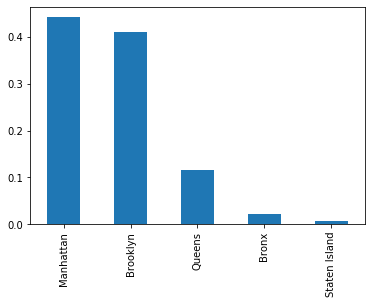

In [14]:
df["Arrondissement"].value_counts(normalize=True).plot(kind='bar')

In [15]:
nbr = df[['prix','Arrondissement']].groupby('Arrondissement').mean().sort_values(by='prix', ascending=False)
nbr.head()

,prix
Arrondissement,
Manhattan,185.534170
Brooklyn,120.284220
Staten Island,101.680108
Queens,96.930426
Bronx,85.361800


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text yticklabel objects>)

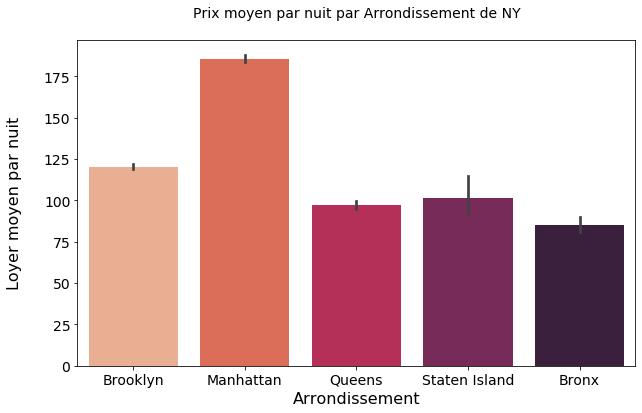

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Arrondissement'], y=df['prix'], palette="rocket_r")
plt.xlabel('Arrondissement', size ="16")
plt.ylabel('Loyer moyen par nuit\n', size ="16")
plt.title("Prix moyen par nuit par Arrondissement de NY\n", fontsize=14)
plt.xticks(fontsize=14)subp
plt.yticks(fontsize=14)

In [17]:
#Top 5 quartier les plus cher de Manhattan

df1 = df[df.Arrondissement == "Manhattan"][["Quartier","prix"]]
d = df1.groupby("Quartier").mean().sort_values(by='prix', ascending=False)
d.head()

,prix
Quartier,
Tribeca,386.953757
Flatiron District,341.925000
NoHo,295.717949
Midtown,278.160078
SoHo,268.402817


Text(0, 0.5, 'Quartier')

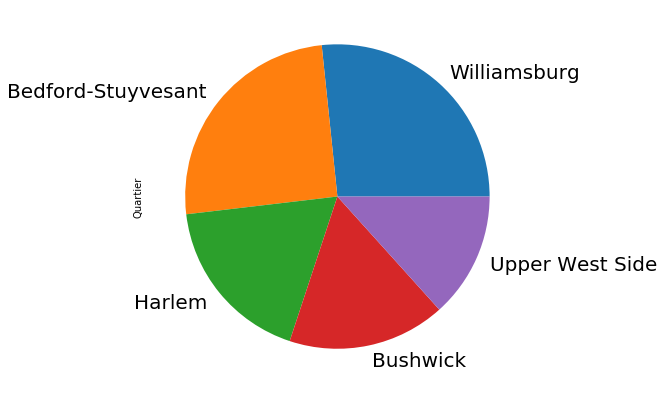

In [18]:
#TOP 5 Quartier les plus représenté à NY

t = df.Quartier.value_counts().head()
t.plot.pie(y='mass', figsize=(7,7),subplots=True,textprops={'fontsize': 20})
plt.ylabel("Quartier")

In [19]:
#TOP 5 Quartier les plus cher en moyenne
df2 = df[df['Quartier'] != 'Fort Wadsworth']
df2 = df2[df2['Quartier'] != 'Woodrow']
v = df2[['prix','Quartier']].groupby('Quartier').mean().sort_values(by='prix', ascending=False)
v.head()

,prix
Quartier,
Sea Gate,487.857143
Prince's Bay,409.500000
Tribeca,386.953757
Flatiron District,341.925000
NoHo,295.717949


#    2) Quels sont les types de logement les plus demandés ? 

Text(0.5, 1.0, 'Types de logements les plus représentés à NY')

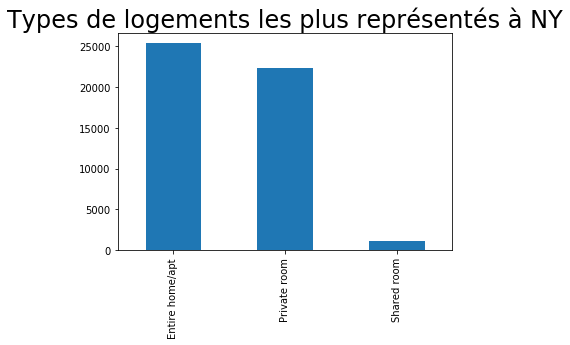

In [20]:
data = df.type_de_logement.value_counts()
data.plot(kind = "bar")
plt.title("Types de logements les plus représentés à NY",size ="24 \n\n\n")

Text(0.5, 1.0, 'Nombre de logement par catégorie et par Arrondissement')

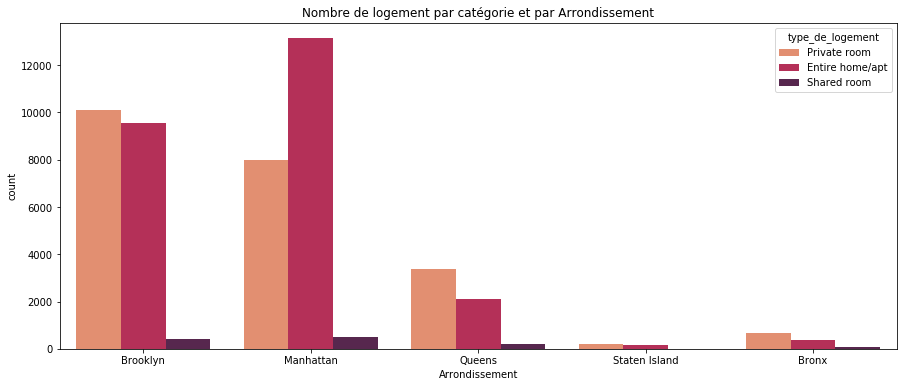

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Arrondissement', hue='type_de_logement', palette='rocket_r')
plt.title('Nombre de logement par catégorie et par Arrondissement')

# 3) Quelle est l'annonce la plus et moins cher et rentable de New York ?

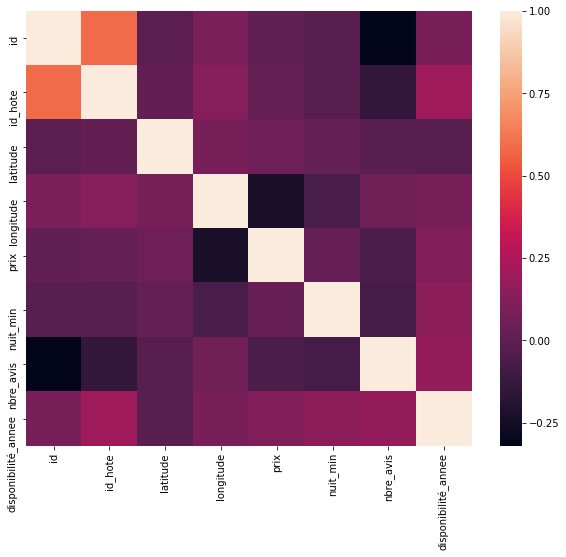

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())

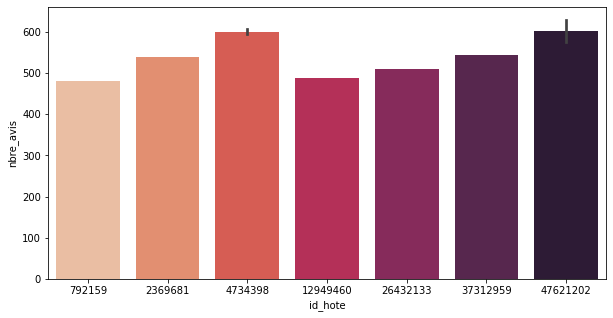

In [23]:
nbre_avismax = df[['nbre_avis','id_hote', 'Arrondissement']]
toz = nbre_avismax.sort_values(by=['nbre_avis'], ascending=False)
toz.set_index('id_hote')
toz = toz.head(10)
plt.subplots(figsize=(10,5))
sns.barplot(x = toz['id_hote'] ,y= toz['nbre_avis'], palette="rocket_r")

In [24]:
toz.head()

,nbre_avis,id_hote,Arrondissement
11759,629,47621202,Queens
2031,607,4734398,Manhattan
2030,597,4734398,Manhattan
2015,594,4734398,Manhattan
13495,576,47621202,Queens


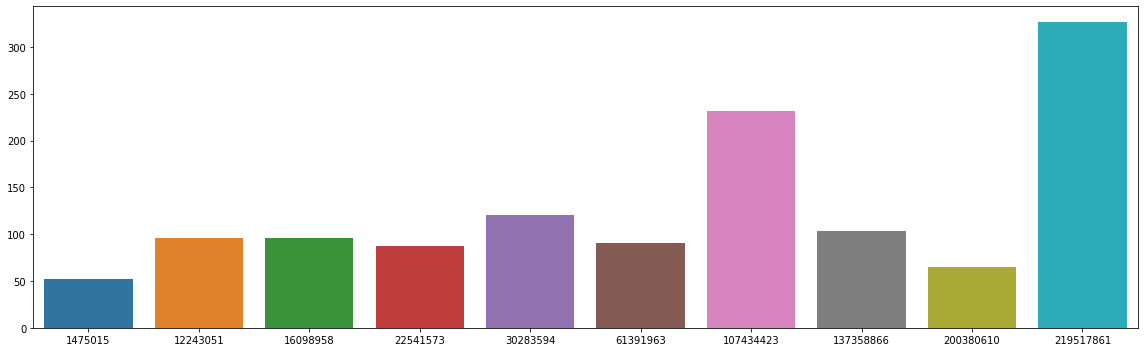

In [25]:
df1 = df.id_hote.value_counts()[:10]
plt.subplots(figsize=(16,5))
sns.barplot(x = df1.index,y=df1.values)
plt.tight_layout()

In [26]:
df.shape

(48798, 14)

# Finition de la corrélation

In [27]:
dfCorr = df
dfCorr['Arrondissement'] =df['Arrondissement'].astype('category').cat.codes
dfCorr['Quartier'] =df['Quartier'].astype('category').cat.codes
dfCorr['type_de_logement'] =df['type_de_logement'].astype('category').cat.codes

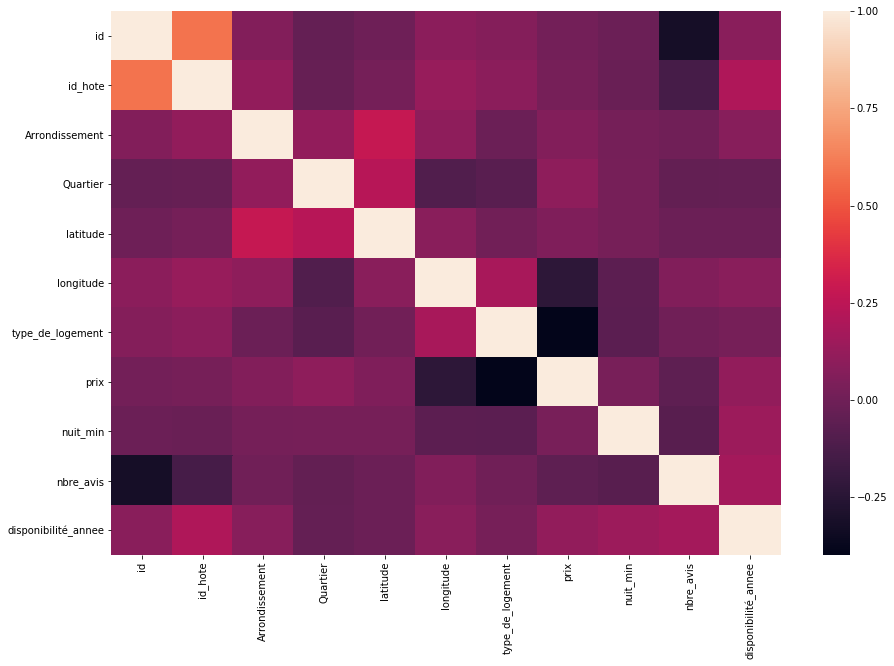

In [28]:
dfCorr.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(dfCorr.corr())

# Répartition des appartements sur une carte par prix

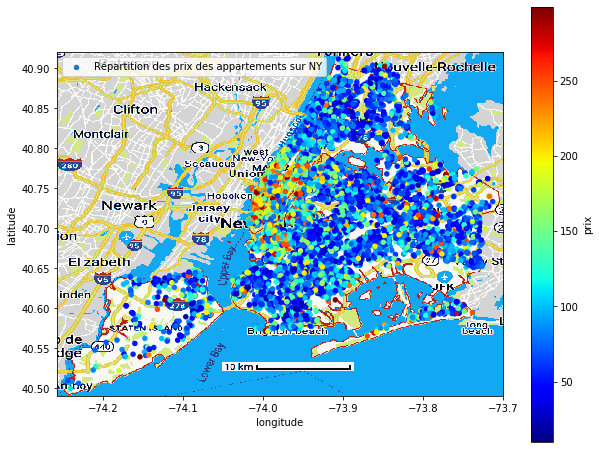

In [30]:
import urllib
total=df[df.prix < 300]

plt.figure(figsize=(10,8))
i=urllib.request.urlopen('https://www.mackoo.com/newyork/images/carte-region8.png')
nyc_img=plt.imread(i)
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

total.plot(kind='scatter', x='longitude', y='latitude',c='prix', ax=ax, label = 'Répartition des prix des appartements sur NY',
           cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

# Quartier et annonces avec les review - Classement des Arrondissement par nombre de notes moyennes

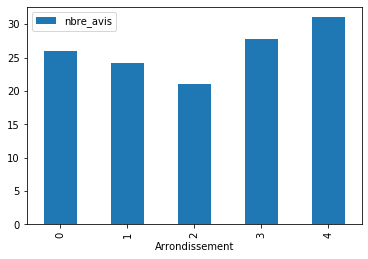

In [31]:
RVA = df[['Arrondissement','nbre_avis']].groupby('Arrondissement').mean()
RVA.plot(kind = 'bar')

# Quartier et annonces avec les review - Classement des Quartier par nombre de notes moyennes

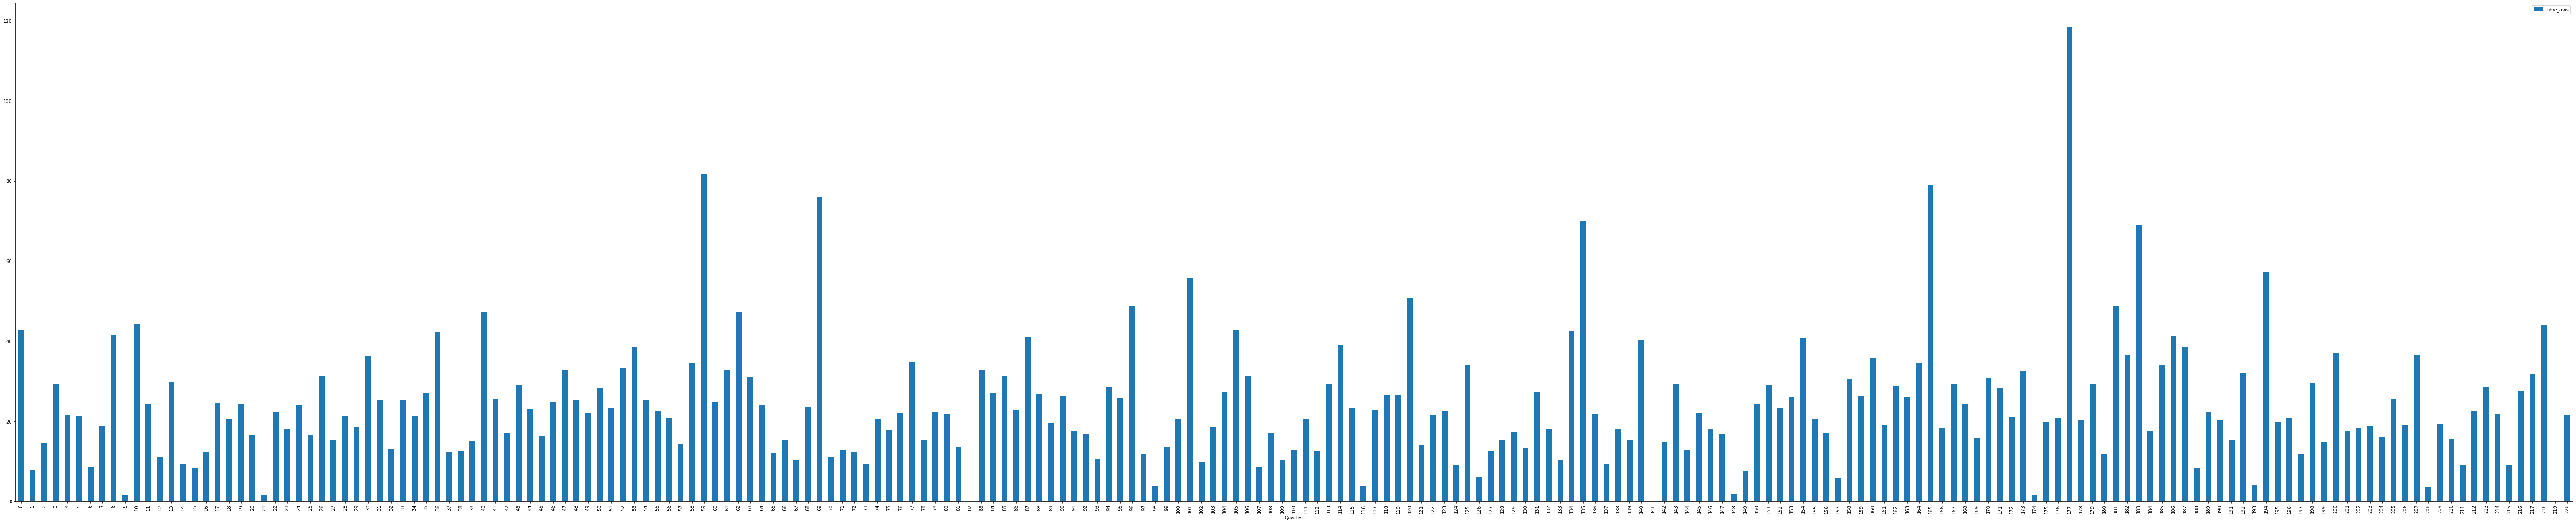

In [32]:
RVQ = df[['Quartier','nbre_avis']].groupby('Quartier').mean()

RVQ.plot(kind = 'bar',figsize=(100, 20))

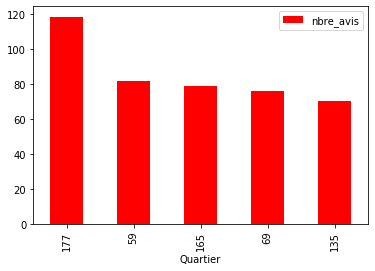

In [33]:
rrr = RVQ.sort_values(by = 'nbre_avis', ascending=False).head()
rrr.plot(kind='bar', color='red')

# Partie 2 - Machine Learning

In [34]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [35]:
#New dataset for the prediction
df = pd.read_csv('AB_NYC_2019.csv')
df1 = df
df1.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
df1['reviews_per_month']=df1['reviews_per_month'].replace(np.nan, 0)

#Normalize the data from neighbourhood_group, neighbourhood and room_type

le = preprocessing.LabelEncoder()
le.fit(df1['neighbourhood_group'])    
df1['neighbourhood_group']=le.transform(df1['neighbourhood_group'])

le = preprocessing.LabelEncoder()
le.fit(df1['neighbourhood'])
df1['neighbourhood']=le.transform(df1['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df1['room_type'])
df1['room_type']=le.transform(df1['room_type'])

In [53]:
#Create model linéaire, et entraine l'algorithme 
lm = LinearRegression()
X = df1[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count']]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3000)
reg = lm.fit(X_train,y_train)
lm.fit(X_train,y_train)
y_predictor=reg.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_predictor)
mse = mean_squared_error(y_test, y_predictor)

prediction = lm.predict(X_test)
r2 = r2_score(y_test,prediction)

In [ ]:
error_diff = pd.DataFrame({'Prix actuel': np.array(y_test).flatten(), 'Prix prédit': predicts.flatten()})
t = error_diff.head(10)

In [ ]:
t.head()

In [ ]:
mse

In [47]:
r2

0.0580217707173043

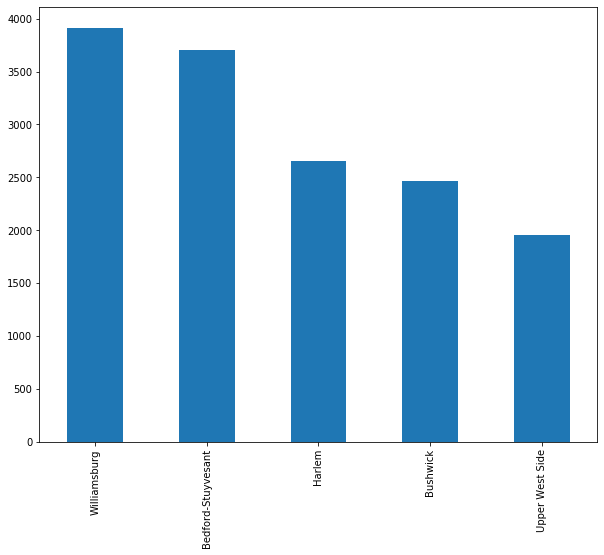

In [49]:
t.plot(kind = 'bar', figsize=(10,8))

In [48]:
#Try to boost R_score because very weak
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
predict = GBoost.predict(X_test)
r2 = r2_score(y_test,predict)
r2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [ ]:
random_forest.fit(X_train, y_train)
y_pred=random_forest.predict(X_test)
random_forest.score(X_test, y_test)